# Lab1 Report: data visualization for movies
   Team member: 
   # 1. Business Understanding
   Our data set is from Kaggle(https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset). There are 28 features and 5043 observations inside. The features range from country, genres to director names, etc, which is quite comprehensive. 

   The purpose of this dataset is to determine or predict the eminence of a movie before releasing to cinema. The dataset collect data of 5000+(relatively large amount in sampling) movies from IMDB website. Since the movies come from 66 different countries, span across about 100 years and involve 2399 dinstinct director names, thousands of actors/actresses, it is diverse and representative. Thus, our chosen data is critical and useful to make prediction. Based on the current dataset, our prediction algorithm take a subset of features as an input build a regression tree and output some possible related-data such as IMDB_score or gross which can describe the greatness of a movie. We can select a set of existed data other than our current dataset to test our prediction algorithm. If the error between the actual data and our predicted data are smaller than a critera value (we say, like 5%), then we could consider our prediction algorithm works well. 
   
   # 2 Data Understanding

## 2.1 Data Description
There are the 28 features of the dataset but we only focus on 9 of them which might be have more influence about the eminence of movie, here is a list of the nine features and their attributes:

    'country' - nominal - one hot encoding  

    'genres' - nominal - one hot encoding 
   
    'director_name' - nominal - one hot encoding
 
    'gross' - ratio - float
    
    'budget' - ratio - float
   
    'imdb_score' - ratio - float
    
    'num_user_for_reviews' - ratio - float
    
    'actor_1_facebook_likes' - ratio - float 

In [11]:
import pandas as pd

mv = pd.read_csv('movie_metadata.csv')
mv.describe()
# mv_grouby = mv.groupby(by = ['genres'])
# mv_grouby.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [12]:
mv.info()
mv = mv[['country','genres','director_name','gross','budget','imdb_score','num_user_for_reviews','actor_1_facebook_likes']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [13]:
mv.head()

,country,genres,director_name,gross,budget,imdb_score,num_user_for_reviews,actor_1_facebook_likes
0,USA,Action|Adventure|Fantasy|Sci-Fi,James Cameron,760505847.0,237000000.0,7.9,3054.0,1000.0
1,USA,Action|Adventure|Fantasy,Gore Verbinski,309404152.0,300000000.0,7.1,1238.0,40000.0
2,UK,Action|Adventure|Thriller,Sam Mendes,200074175.0,245000000.0,6.8,994.0,11000.0
3,USA,Action|Thriller,Christopher Nolan,448130642.0,250000000.0,8.5,2701.0,27000.0
4,NaN,Documentary,Doug Walker,NaN,NaN,7.1,NaN,131.0


## 2.2 Data Quality

We will clean our dataset before doing data visualization.

In [14]:
import numpy as np

missmv = pd.isnull(mv)
mv[missmv.any(axis=1)]

,country,genres,director_name,gross,budget,imdb_score,num_user_for_reviews,actor_1_facebook_likes
4,NaN,Documentary,Doug Walker,NaN,NaN,7.1,NaN,131.0
55,USA,Adventure|Animation|Comedy|Family|Fantasy,Peter Sohn,123070338.0,NaN,6.8,345.0,275.0
84,Belgium,Action|Adventure|Romance|Sci-Fi,Roland Joffé,NaN,NaN,4.5,15.0,622.0
98,Japan,Action|Adventure|Drama|Horror|Sci-Fi,Hideaki Anno,NaN,NaN,8.2,13.0,544.0
177,USA,Action|Crime|Drama|Mystery|Thriller,NaN,NaN,1500000.0,7.5,74.0,982.0
199,UK,Action|Fantasy,Matt Birch,NaN,NaN,7.5,2.0,10000.0
204,Japan,Action|Adventure|Drama|Horror|Sci-Fi,Hideaki Anno,NaN,NaN,8.2,13.0,544.0
206,UK,Fantasy,Matt Birch,NaN,NaN,6.4,2.0,10000.0
242,France,Adventure|Comedy|Family|Fantasy,Frédéric Forestier,NaN,78000000.0,5.1,36.0,936.0
260,USA,Action|Adventure|Crime,NaN,NaN,NaN,7.6,97.0,669.0


Above are 1155 rows which contain NaN in at least one attribute we concerned. Budget and gross seems to be absent more frequently in the dataset. The attribute country and director_name occassionaly lack their value. Other attributes are very rare to be empty.

The reason budget and gross are more frequently empty may due to production company or organization refuse to provide those data to the data collector. Also, those value may still in counting process at the time the collector gathering them, so that those data remain empty. And director_name is empty at row 5039 may because the movie does not provide details to public. Row 4 lacks of country value may because its not applicable, this movie may finished by many companies so that it is hard to define a certain region for it. But we do not consider those missing values are mistakes. 

The way we want to deal with country and budget is imputation. For country, we can impute it by choosing the mode based on the subgroup of same director since director usually direct in the country where he has most resource; for genres, we can impute it by filling the mode of subgroup of same director as well since people usually have a preference to the genres; for budget, we can impute the value by analyzing the mean of genres. We will eliminate director name missing values because there is no way for us to make an analogy about who is the director. Also, for either missing gross or imdb_score, which is possible to be the label, we choose to elminate those observations. As for actor_1_facebook_likes, it is hard to impute by subgroup and it is meaningless to impute by the mean, median, or mode. Thus, we also delete the observation with missing actor_1_facebook_likes.

In [15]:
# we first eliminate some missing data like director_name and then do the imputation.
def elminate_missing(df,feature):
    missdf = pd.isnull(df[feature])
    for idx in missdf.index:
        if missdf[idx] == True:
            df = df.drop(idx)
    return df
def impute_missing(df,feature,subgroup_feature):
    missdf = pd.isnull(df[feature])
    for idx in missdf.index:
        if missdf[idx] == True:
            sub = df[subgroup_feature][idx]
            subgp = df[df[subgroup_feature]==sub]
#             print(subgp)
            if subgp is not None:    
                df = df.fillna(subgp[feature].value_counts().index[0])
            else:
                df = deal_missing(df,feature)
    return df       
mv = elminate_missing(mv,'director_name')
mv = elminate_missing(mv,'gross')
mv = elminate_missing(mv,'imdb_score')
mv = elminate_missing(mv,'actor_1_facebook_likes')
mv = impute_missing(mv,'country','director_name')
mv = impute_missing(mv,'genres','director_name')
mv = impute_missing(mv,'budget','genres')
mv

,country,genres,director_name,gross,budget,imdb_score,num_user_for_reviews,actor_1_facebook_likes
0,USA,Action|Adventure|Fantasy|Sci-Fi,James Cameron,760505847.0,237000000.0,7.9,3054.0,1000.0
1,USA,Action|Adventure|Fantasy,Gore Verbinski,309404152.0,300000000.0,7.1,1238.0,40000.0
2,UK,Action|Adventure|Thriller,Sam Mendes,200074175.0,245000000.0,6.8,994.0,11000.0
3,USA,Action|Thriller,Christopher Nolan,448130642.0,250000000.0,8.5,2701.0,27000.0
5,USA,Action|Adventure|Sci-Fi,Andrew Stanton,73058679.0,263700000.0,6.6,738.0,640.0
6,USA,Action|Adventure|Romance,Sam Raimi,336530303.0,258000000.0,6.2,1902.0,24000.0
7,USA,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Nathan Greno,200807262.0,260000000.0,7.8,387.0,799.0
8,USA,Action|Adventure|Sci-Fi,Joss Whedon,458991599.0,250000000.0,7.5,1117.0,26000.0
9,UK,Adventure|Family|Fantasy|Mystery,David Yates,301956980.0,250000000.0,7.5,973.0,25000.0
10,USA,Action|Adventure|Sci-Fi,Zack Snyder,330249062.0,250000000.0,6.9,3018.0,15000.0


In [16]:
mv[mv.duplicated(keep = False)]

,country,genres,director_name,gross,budget,imdb_score,num_user_for_reviews,actor_1_facebook_likes
6,USA,Action|Adventure|Romance,Sam Raimi,336530303.0,258000000.0,6.2,1902.0,24000.0
17,USA,Action|Adventure|Sci-Fi,Joss Whedon,623279547.0,220000000.0,8.1,1722.0,26000.0
25,New Zealand,Action|Adventure|Drama|Romance,Peter Jackson,218051260.0,207000000.0,7.2,2618.0,6000.0
30,UK,Action|Adventure|Thriller,Sam Mendes,304360277.0,200000000.0,7.8,1498.0,883.0
33,USA,Adventure|Family|Fantasy,Tim Burton,334185206.0,200000000.0,6.5,736.0,40000.0
38,USA,Adventure|Family|Fantasy,Sam Raimi,234903076.0,215000000.0,6.4,511.0,44000.0
40,USA,Action|Adventure|Sci-Fi,Joseph Kosinski,172051787.0,170000000.0,6.8,665.0,12000.0
50,Australia,Drama|Romance,Baz Luhrmann,144812796.0,105000000.0,7.3,753.0,29000.0
63,USA,Action|Adventure|Drama|Romance,David Yates,124051759.0,180000000.0,6.6,239.0,11000.0
79,UK,Adventure|Drama|Family|Fantasy,Jon Favreau,362645141.0,175000000.0,7.8,398.0,19000.0


Above are the duplicated rows in the dataset. We choose the option keep equals to False which means if a row repeat more than onece, we print all the duplicate data including the first time it appears. For example, index 174 and index 187 are two identical rows. Thoese duplicated rows appears due to unintentional mistake made by the data provider. 
Duplicated data are useless for our purpose, because we do not want to analyze the exact movie and its data again. We conclude these data are mistakes and need to be eliminated. 

In [17]:
before_drop = len(mv)
mv = mv.drop_duplicates()
after_drop = len(mv)
if after_drop == before_drop - len(mv[mv.duplicated()]):
    print("drop successful")
# mv

Here, we drop all the duplicate data and test for its correctness.

## Feature Discretization

Let's break up the imdb_score into four ranges whose labels are 

0-4 : bad

4-7 : median

7-9 : good

9-10 : fantastic


In [18]:
mv['score_range'] = pd.cut(mv.imdb_score,[0,4,7,9,10], 
                           labels = ['1.bad','2.median','3.good','4.fantastic'])
mv.score_range.describe()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count         4052
unique           4
top       2.median
freq          2709
Name: score_range, dtype: object

# 3 Data Visualization

## 3.1 Data Exploration


In [19]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

### 3.1.1 Average Gross by top 10 productive country

The plot shows that the top 10 productive country and their average gross per movie. We first group by the country and count up the number of observation in each country. Then, we sort the group and only pick up the top ten countries. Then, we compute the gross average of the ten countries and make the histogram.

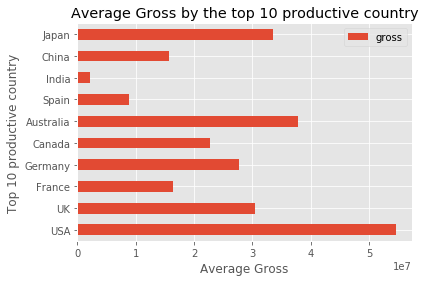

In [20]:
plt.style.use('ggplot')
mv_group_country = mv.groupby(by=['country'])
top_ten = mv[['gross','country']].groupby(['country'])['country'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)
top_ten.index = list(range(10))
gross_ave = mv_group_country.gross.mean()
gross_selected = []
for item in top_ten.country:
    gross_selected.append(gross_ave[gross_ave.index == item].values)
s_to_form_df = pd.Series(gross_selected)
top_ten.country
dict = {'country' : top_ten.country, 'gross' : s_to_form_df.astype(float)}
plot1 = pd.DataFrame(dict)
plot1.index = plot1.country
ax = plot1.plot(kind='barh')
plt.title('Average Gross by the top 10 productive country')
plt.xlabel('Average Gross')
plt.ylabel('Top 10 productive country')
# plot1

From the figure, we can find that the USA has the highest average gross ( $5.6 *10^7$) per moive. Australia is the second one, has about $3.8*10^7$ average gross per moive.

### 3.1.2 imdb_score by break_down high_low gross range

Here, we would like to break up the gross into two ranges:

high (True) - range in 0 - 2.5e+07 

low (False)- range in 2.5e+07 - 7.7e+08


gross_range  False  True 
score_range              
1.bad           74     28
2.median      1362   1347
3.good         584    655
4.fantastic      0      2


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


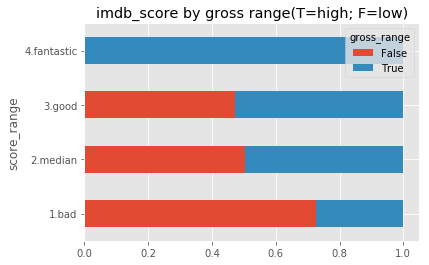

In [21]:
plt.style.use('ggplot')
mv.describe()
mv['gross_range'] = pd.cut(mv.gross,[0,2.5e+07,7.67e+08], 
                           labels = ['low','high'])
mv.gross_range.replace(to_replace = ['low', 'high'],
                 value = range(0,2), inplace = True)

left = pd.crosstab([mv['score_range']], 
                       mv.gross_range.astype(bool))
print(left)

left_rate = left.div(left.sum(1).astype(float),
                             axis=0) # normalize the value
left_rate.plot(kind='barh', 
                   stacked=True)
plt.title('imdb_score by gross range(T=high; F=low)')

For the figure above, we can see that for the high score moives, all of them belong to the high-gross group. As to the middle two parts, we can see that for some movies has good scores but have low gross (nearly half-and-half). For the moives have bad score, 75% of them has low gross which is reasonable. Generally, the score and gross are positive related although there is some rare case that a movie has a high score but low gross or a movie has a low score but high gross.  

## 3.1.3 Distributions of Continuous Features


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


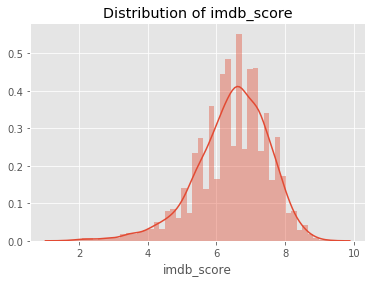

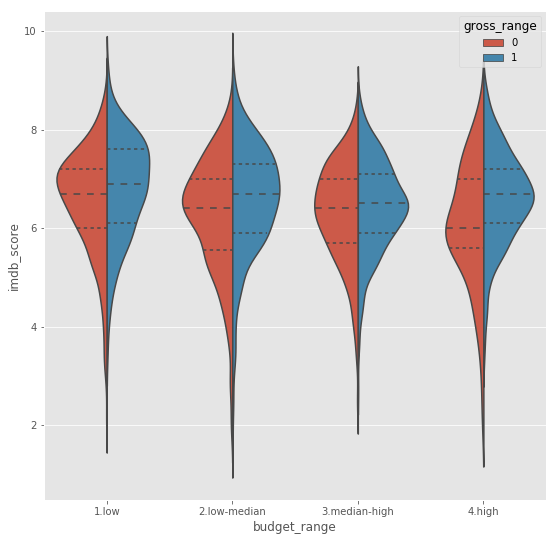

In [22]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(mv.imdb_score)
plt.title('Distribution of imdb_score')
f, ax = plt.subplots(figsize=(9, 9))

mv.budget.quantile(.25)
mv['budget_range'] = pd.cut(mv.budget,[0,mv.budget.quantile(.25),mv.budget.quantile(.5),mv.budget.quantile(.75),mv.budget.quantile(1)+1], 
                           labels = ['1.low','2.low-median','3.median-high','4.high'])

sns.violinplot(x="budget_range", y="imdb_score", hue="gross_range", data=mv, 
               split=True, inner="quart")


Add some explanations here


## 3.2 Data Relationship Exploration

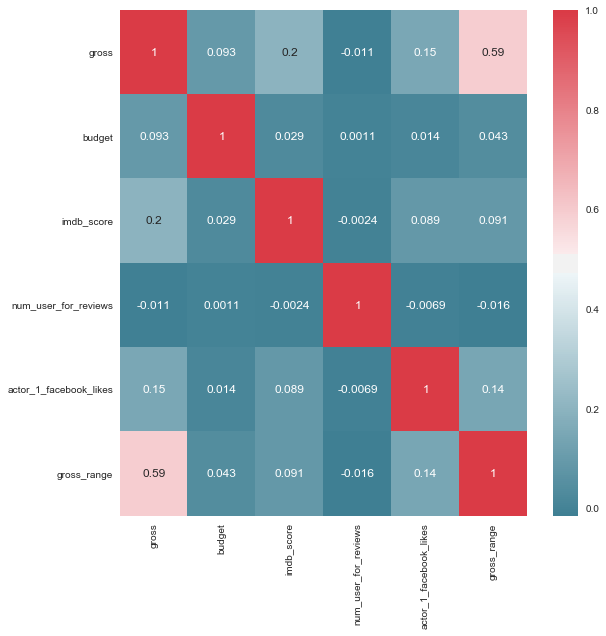

In [23]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(mv.corr(), cmap=cmap, annot=True)

f.tight_layout()

Based on the correlation table of features (column by column), 

# 4 Dimensionality Reduction


In [25]:
from sklearn.decomposition.pca import PCA
from sklearn import preprocessing
